In [184]:
from lib.utils import *
from lib.models import *
from lib.ekyn import *
from lib.env import *
from lib.datasets import *

In [185]:
try:
    conn = sqlite3.connect(f'../data/courtney_aug_oct_2022_baseline_recordings/0_raw_zdb/22-Aug-B.zdb')
except Error as e:
    print(e)
cur = conn.cursor()
query = "SELECT value FROM internal_property WHERE key='RecordingStart'"
cur.execute(query)
result = cur.fetchall()
recording_start = int(result[0][0])
query = "SELECT value FROM internal_property WHERE key='RecordingStop'"
cur.execute(query)
result = cur.fetchall()
recording_stop = int(result[0][0])
length_ns = recording_stop - recording_start # ns
length_s = length_ns * 1e-7 # s
hh = length_s // 3600
mm = (length_s % 3600) // 60
ss = ((length_s % 3600) % 60)
print(hh,mm,ss,length_s)
print(recording_start)
print(recording_stop)

113.0 50.0 13.0 409813.0
637964344780000000
637968442910000000


In [194]:
raw = read_raw_edf((f'../data/courtney_aug_oct_2022_baseline_recordings/1_raw_edf/22-Aug-B.edf'),verbose=False)
fs = 500
raw.times.shape[0] / fs # s
measurement_date = raw.info["meas_date"]
print(measurement_date)

2022-08-18 15:47:58+00:00


In [187]:
df = pd.read_excel(f'../data/courtney_aug_oct_2022_baseline_recordings/2_labels/CW 22-Aug-B Baseline.xls')
df = df.drop(0).reset_index(drop=True)
df

WARNING *** file size (1897489) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


,Start Time,Label
0,2022-08-19 07:00:00,W
1,2022-08-19 07:00:10,W
2,2022-08-19 07:00:20,W
3,2022-08-19 07:00:30,W
4,2022-08-19 07:00:40,W
...,...,...
34551,2022-08-23 06:59:10,W
34552,2022-08-23 06:59:20,W
34553,2022-08-23 06:59:30,W
34554,2022-08-23 06:59:40,W


In [220]:
df['Start Time'].diff().value_counts()

0 days 00:00:10    34554
0 days 00:00:50        1
Name: Start Time, dtype: int64

In [233]:
start_time = df['Start Time'][0]
end_time = df.iloc[-1,0]
start_time

datetime.datetime(2022, 8, 19, 7, 0)

In [242]:
length = (end_time - start_time)

34559.0

In [248]:
import datetime
times = [start_time + datetime.timedelta(seconds=10*i) for  i in range(int((length.days*86400 + length.seconds)/10)+1)]
print(len(times))
print(times[0])
print(times[-1])

34560
2022-08-19 07:00:00
2022-08-23 06:59:50


In [208]:
# eeg = from_numpy(eeg.reshape(-1, 5000)).float()

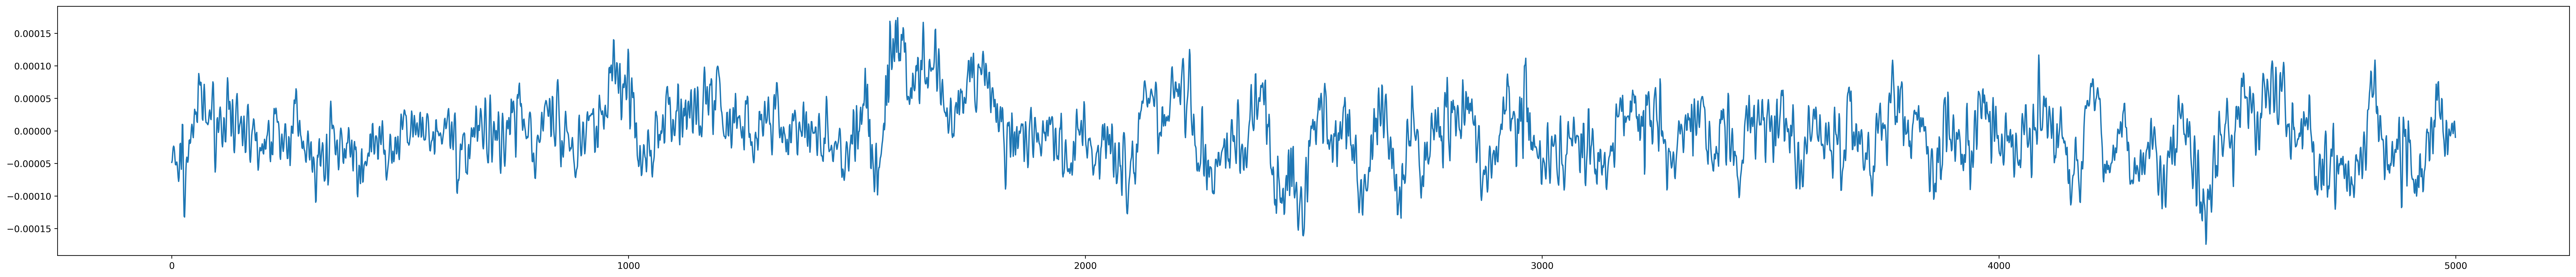

In [189]:
plt.figure(figsize=(50,5),dpi=500)
plt.plot(eeg[:5000])
plt.savefig('out.pdf')

In [195]:
measurement_date = measurement_date.replace(tzinfo=None)

In [197]:
offset = df.iloc[0,0] - measurement_date

In [215]:
eeg = raw.get_data(picks='EEG 1')[0]
eeg = eeg[offset.seconds*500:-4000]

In [216]:
eeg.shape[0]/5000

35509.0

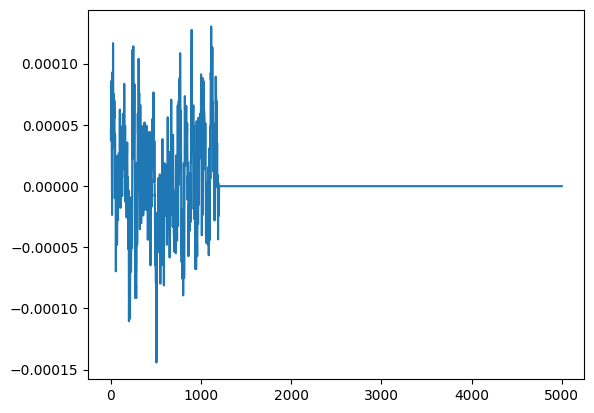

In [207]:
plt.plot(eeg[-5000:])

In [ ]:
offset.seconds*500

In [ ]:
df['Start Time'].astype('datetime64').diff().value_counts()

In [ ]:

df[df['label'] == 'X'] = NA
df = df.fillna(method='ffill')
return from_numpy(Categorical(df['label']).codes.copy()).long()

In [ ]:
windowsize = 9


(cat([zeros(windowsize//2,5000),load_epoched_eeg(id=id, condition=condition),zeros(windowsize//2,5000)]), load_one_hot_labels(id=id, condition=condition))